In [4]:
#Descenso del gradiente 

In [1]:
import numpy
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams["figure.figsize"]=[10,10]

In [3]:
f=lambda x: x**2 -2*x +4

In [4]:
f_prima=lambda x: 2*x -2

In [25]:
def descenso_gradiente(x,step_size):
    return x -step_size*(f_prima(x))

In [28]:
def minimo(x_0,iters,step_size,func):
    x=x_0
    for _ in range(iters):
        x=func(x,step_size)
        print("{}\n".format(x))

In [31]:
minimo(10,10,0.4,descenso_gradiente)

2.8

1.3599999999999999

1.072

1.0144

1.00288

1.000576

1.0001152

1.00002304

1.000004608

1.0000009216



In [67]:
#Batch Gradient Descent

In [68]:
from sklearn.datasets import make_regression

In [69]:
n_muestras=1000
n_variables=2

In [70]:
X, y, coeficientes_objetivo=make_regression(n_samples=n_muestras, n_features=n_variables,coef=True)

In [71]:
def predecir_batch(coeficientes, X):
    return coeficientes @ X.T

In [74]:
y_predicciones=predecir_batch(coeficientes_objetivo, X)

In [75]:
y_predicciones[:10]-y[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [76]:
#se usa el Error Cuadratico Medio dividido entre 2, para que su derivada no tenga el 2

In [77]:
def error_batch(y_pred, y_true):
    m=y_pred.shape[0]
    return (numpy.sum(y_pred-y_true)**2)/2*m

In [78]:
#la derivada de la funcion de error

In [79]:
def derivada_error_batch(y_pred, y_true, x):
    m=y_pred.shape[0]
    return numpy.sum((y_pred-y_true)*x/m)

In [80]:
#Para empezar el proceso se generan los coeficientes iniciales al azar

In [85]:
coeficientes=numpy.random.random((X.shape[1],))
coeficientes

array([0.8674386 , 0.58680619])

In [86]:
#Ahora se puede predecir y calcular el error y la derivada del error

In [87]:
y_pred=predecir_batch(coeficientes, X)

In [88]:
error_batch(y_pred, y)

7084604236.20393

In [89]:
derivada_error_batch(y_pred, y, X[:,0])

-29.270834207111534

In [90]:
#Ya se tiene todo para implementar el descenso de gradiente batch

In [91]:
def descenso_gradiente_batch(coeficientes, X, y):
    y_predicciones=predecir_batch(coeficientes, X)
    for i in range(coeficientes.shape[0]):
        coeficientes[i]=coeficientes[i]-step_size*derivada_error_batch(y_predicciones, y, X[:,i])
    error=error_batch(y_predicciones, y)
    return coeficientes, error

In [92]:
#Simplemente definimos un numero de iteraciones y un tamaño de paso, iteraremos y en cada iteracion se modifican
#los parametros del modelo en funcion del tamaño de paso

In [102]:
coeficientes_iteraciones=[]
error_iteraciones=[]

n_iteraciones=100
step_size=0.05
coeficientes=numpy.random.random((X.shape[1],))
error=error_batch(coeficientes, X)
for _ in range(n_iteraciones):
    coeficientes_iteraciones.append(coeficientes.copy())
    error_iteraciones.append(error)
    coeficientes, error=descenso_gradiente_batch(coeficientes, X, y)

coeficientes_iteraciones=numpy.array(coeficientes_iteraciones)

In [103]:
print(coeficientes)
print(coeficientes_objetivo)

[31.60310841 81.59104018]
[31.83698116 82.03567757]


Text(0.5, 1.0, 'Evolucion del error con el numero de iteraciones')

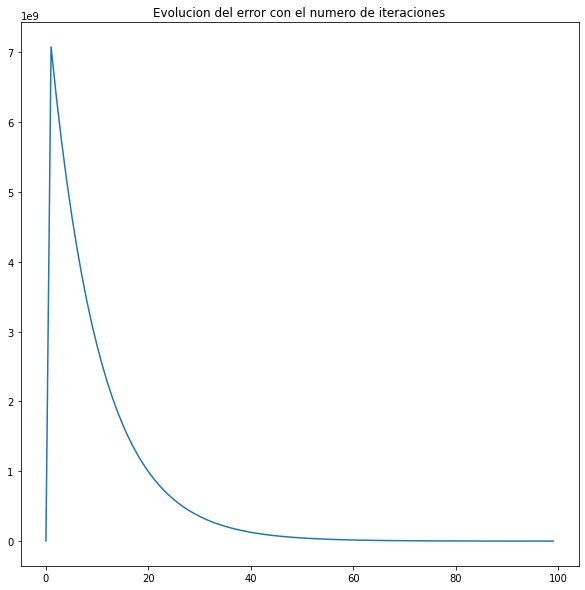

In [104]:
plt.plot(error_iteraciones)
plt.title("Evolucion del error con el numero de iteraciones")

Text(0.5, 1.0, 'Evolucion de coeficientes con el numero de iteraciones')

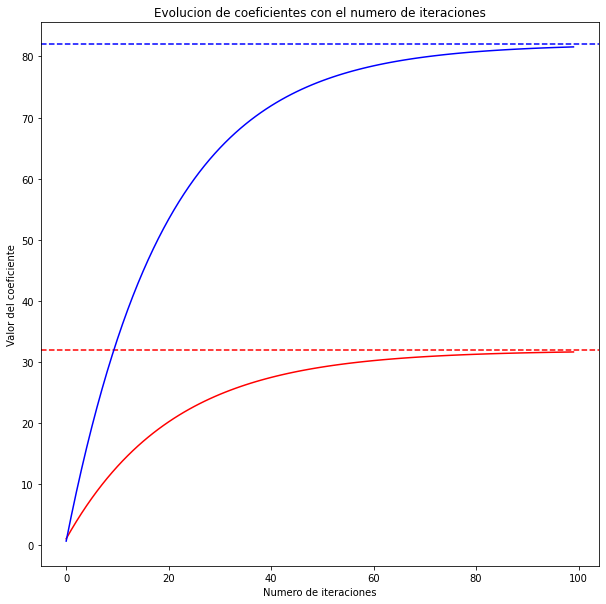

In [105]:
plt.plot(coeficientes_iteraciones[:,0], color="red")
plt.axhline(coeficientes_objetivo[0], color="red", linestyle="dashed")

plt.plot(coeficientes_iteraciones[:,1], color="blue")
plt.axhline(coeficientes_objetivo[1], color="blue", linestyle="dashed")

plt.xlabel("Numero de iteraciones")
plt.ylabel("Valor del coeficiente")

plt.title("Evolucion de coeficientes con el numero de iteraciones")

In [106]:
#Descenso de gradiente estocastico (SGD)

In [107]:
def predecir_observacion(coeficientes, x):
    return coeficientes @ x.T

In [108]:
predecir_observacion(coeficientes, X[0])

-21.204100879945106

In [109]:
def derivada_error_observacion(y_pred, y_true, x):
    return (y_pred-y_true) * x

In [110]:
derivada_error_observacion(predecir_observacion(coeficientes, X[0]), y[0], X[0,0])

0.05052479261018904

In [111]:
#La definicion de la iteracion de SGD es similar a la de batch, simplemente usando el error de observacion en vez de el error total

In [113]:
def descenso_gradiente_estocastico(coeficientes, x, y):
    y_predicciones=predecir_observacion(coeficientes, x)
    for i in range(coeficientes.shape[0]):
        coeficientes[i]=coeficientes[i] -step_size*derivada_error_observacion(y_predicciones, y, x[i])
    return coeficientes

In [114]:
#Ahora se hace solo una iteracion, pero la iteramos para cada observacion individual

In [115]:
coeficientes_iteraciones=[]
error_iteraciones=[]

step_size=0.05
coeficientes=numpy.random.random((X.shape[1],))
error=error_batch(coeficientes, X)

indice_aleatorio=numpy.random.permutation(X.shape[0])
for i in indice_aleatorio:
    error_iteraciones.append(error)
    x_iteracion=X[i]
    y_iteracion=y[i]
    coeficientes_iteraciones.append(coeficientes.copy())
    coeficientes=descenso_gradiente_estocastico(coeficientes, x_iteracion, y_iteracion)

    y_predicciones=predecir_batch(coeficientes, X)
    error=error_batch(y_predicciones, y)
    
coeficientes_iteraciones=numpy.array(coeficientes_iteraciones)

In [116]:
print(coeficientes)
print(coeficientes_objetivo)

[31.83698116 82.03567757]
[31.83698116 82.03567757]


Text(0.5, 1.0, 'Evolucion de coeficientes con el numero de iteraciones')

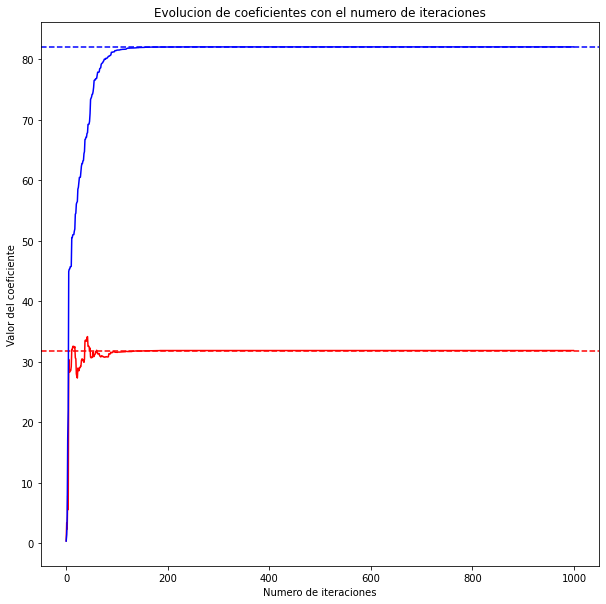

In [117]:
plt.plot(coeficientes_iteraciones[:,0], color="red")
plt.axhline(coeficientes_objetivo[0], color="red", linestyle="dashed")

plt.plot(coeficientes_iteraciones[:,1], color="blue")
plt.axhline(coeficientes_objetivo[1], color="blue", linestyle="dashed")

plt.xlabel("Numero de iteraciones")
plt.ylabel("Valor del coeficiente")

plt.title("Evolucion de coeficientes con el numero de iteraciones")

In [118]:
#SGD en scikit-learn
#Scikit-learn tiene estimadores para regresion y clasificacion basados en SGD, SGDRegressor y SGDClassifier

#Los parametrps mas importantes para estos estimadores son:

#loss_ La funcion de perdidas a utilizar
#learnin_rate: El tamaño de paso, tambien llamado learning rate (ratio de aprendizaje)
#max_iter: Numero de iteraciones (tambien llamadas epocas)

In [119]:
from sklearn.linear_model import SGDClassifier, SGDRegressor

In [120]:
estimador_sgd=SGDRegressor(max_iter=10)
estimador_sgd.fit(X,y)

c:\Users\xmax1\Desktop\tf15\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(max_iter=10)

In [122]:
print(estimador_sgd.coef_)
print(coeficientes_objetivo)

[31.83352501 82.0274143 ]
[31.83698116 82.03567757]


In [124]:
from sklearn.model_selection import cross_val_score
cross_val_score(SGDRegressor(max_iter=20), X, y, scoring="neg_mean_squared_error")

array([-9.66572482e-05, -7.95596483e-05, -7.46442285e-05, -7.55687137e-05,
       -9.03135066e-05])